# Telecom Churn: Cleansing, Wrangling & Modeling

In [25]:
"import required libraries"
#data analysis library
import pandas as pd

# Import Classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

#import train test split
from sklearn.model_selection import train_test_split
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#pickle to save model
import pickle

#visualization libraraies
import seaborn as sns

#manage warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the file
telco_df = pd.read_csv("data/telco.csv", index_col=[0])
#info about the data
print("Shape of the dataset" + str(telco_df.shape))
telco_df.head(3)

Shape of the dataset(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned


In [3]:
#check for unique customers
print("Number of unique customers in the dataset: " 
      + str(len(telco_df.customerID.unique())))

Number of unique customers in the dataset: 7043


In [4]:
#general info about the dataset
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 1. Data Cleansing

In [5]:
#get the uniq for each column
print(telco_df.apply(lambda col: col.unique()))

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                               [No, Yes]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                           [DSL, Fiber optic, No, dsl]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

## Observations

1. Out of the 21 features in the dataset only 3 are numerical (float) features while the rest of them with the exception of customerID are categorical features.
2. customerID column is not relevant hence it can converted to index
3. TotalCharges is a numerical column however, it is encoded as object.
4. InternetService has DSL & dsl as distinct values, however, both of them mean the same thing.

## Cleansing Tasks

1. Make customerID as the index
2. Replace dsl with "DSL" in the InternetService column.
3. Encode TotalCharges column as float
4. Correctly change the dtypes of the column to either category or float

In [6]:
#make the customerID feature as the index
telco_df = telco_df.set_index("customerID")
telco_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned


In [7]:
#fix the InternetService feature
telco_df['InternetService'].replace({"dsl": "DSL"}, inplace=True)
telco_df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [8]:
#change the dtype of TotalCharges as float
telco_df['TotalCharges'] = telco_df['TotalCharges'].replace(" ", 0)\
                                .astype('float')
telco_df['TotalCharges'].dtypes

dtype('float64')

In [9]:
def convert_cat(df):
    """
    Function to convert the object type variables to categorical
    
    INPUT:
        1: df(pandas dataframe): dataframe with object columns
    
    OUTPUT:
        1: df(pandas dataframe): converted dataframe with only float and categorical columns
    """
    #slice the dataframe with only object columns
    cat_df = telco_df.select_dtypes(include="object")
    #get the col names
    colnames = list(cat_df)
    
    #convert to categorical
    cat_df = cat_df.astype('category')
    #assing to original dataframe
    df[colnames] = cat_df
    
    return df

#call the function to convert the variables to category
clean_teleco_df = convert_cat(telco_df)

In [10]:
clean_teleco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod 

## Data Wrangling

In [11]:
clean_teleco_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Stayed
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned


Since the classifiers requires that the data is in numerical format each of the categorical feature has to either be label encoded or one-hot encoded depending on the order of the values. Below are the details for each of the encoding.

### One-hot Encoding

Following variables will be one-hot encoded as they have no order

1. gender
2. PaymentMethod
3. Contract

### Label Encoding
Following variables will be label encoded as they have an order
1. Senior Citizen
2. Partner
3. Dependents
4. PhoneService
5. MultipleLines
6. InternetService
7. OnlineSecurity
8. OnlineBackup
9. DeviceProtection
10. TechSupport
11. StreamingTV
12. StreamingMovies
13. PaperlessBilling
14. Churn

In [12]:
#convert columns with two values to binary
def encoder(df, colname, mapping_dict):
    """
    Function maps the given dictonary to given column names
    and converts them to binary integers.
    
    INPUT:
        1. df(pandas dataframe): dataframe to map the values to.
        2. colname(string): column from the dataframe for which the values are to be mapped
        3. mapping_dict(dict): key-values to be mapped
        
    OUTPUT:
        1.df(pandas dataframe): dataframe with the values mapped to it
    """
    df[colname] = df[colname].replace(mapping_dict)
    #convert to integer
    df[colname] = df[colname].astype("int")
    
    return df

In [13]:
#encode senior citizen, partner, dependent, PaperlessBilling to binary
mapper = {"Yes": 1, "No": 0}
final_df = encoder(telco_df, "SeniorCitizen", mapper)
final_df = encoder(final_df, "PhoneService", mapper)
final_df = encoder(final_df, "Partner", mapper)
final_df = encoder(final_df, "Dependents", mapper)
final_df = encoder(final_df, "PaperlessBilling", mapper)

#label encode Addons
add_ons_dict = {"Yes": 2, "No": 1, "No internet service": 0}
final_df = encoder(final_df, "OnlineBackup", add_ons_dict)
final_df = encoder(final_df, "OnlineSecurity", add_ons_dict)
final_df = encoder(final_df, "TechSupport", add_ons_dict)
final_df = encoder(final_df, "StreamingTV", add_ons_dict)
final_df = encoder(final_df, "StreamingMovies", add_ons_dict)
final_df = encoder(final_df, "DeviceProtection", add_ons_dict)
#label encode multiple lines
mlines_mapper = {"Yes": 2, "No": 1, "No phone service": 0}
final_df = encoder(final_df, "MultipleLines", mlines_mapper)

#label encode InternetService column
mlines_mapper = {"Fiber optic": 2, "DSL": 1, "No": 0}
final_df = encoder(final_df, "InternetService", mlines_mapper)

#encode churn
churn_mapper = {"Stayed": 0, "Churned": 1}
final_df = encoder(final_df, "Churn", churn_mapper)

final_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,1,0,1,0,0,1,1,2,1,1,1,1,Month-to-month,1,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,0,0,34,1,1,1,2,1,2,1,1,1,One year,0,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,0,0,2,1,1,1,2,2,1,1,1,1,Month-to-month,1,Mailed check,53.85,108.15,1


In [14]:
#one-hot encode rest of the cols
def one_hot_encoder(df, colname):
    """
    Function one-hot encodes the required column
    
    INPUT:
        1. df(pandas dataframe): dataframe to map the values to.
        2. colname(string): column from the dataframe for which the values
                            to be one-hot-encoded
    OUTPUT:
        1.df(pandas dataframe): dataframe with the one-hot encoded values
    """
    #get the dummy variables
    df = pd.get_dummies(df, columns=[colname])
    #fix the colnames
    df.columns = [c.replace(" ", "_") for c in df.columns]
    
    return df

In [15]:
#one-hot encode gender
final_df = one_hot_encoder(final_df, "gender")
#one-hot encode Contract
final_df = one_hot_encoder(final_df, "Contract")
#one-hot encode PaymentMethod
final_df = one_hot_encoder(final_df, "PaymentMethod")

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   InternetService                          7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                           

## Modeling

### Spliting the Data

In [22]:
def get_train_test(df):
    """
    Function to split the data into training and testing set
    
    INPUT: 
        df(pandas dataframe): dataframe to split
    
    OUTPUT:
        X_train(pandas dataframe): training dataset 67% of the total data
        y_train(pandas dataframe): labels 67% of the total data
        X_test(pandas dataframe): training dataset 33% of the total data
        y_test(pandas dataframe): labels 33% of the total data 
    """
    #split the data
    train, test = train_test_split(df, test_size=0.33, random_state=42)
    #X train and test split
    X_train = train.iloc[:,:-1]
    X_test = test.iloc[:,:-1]
    #y train and test split
    y_train = train.iloc[:,-1:]
    y_test = test.iloc[:,-1:]
    
    return X_train, y_train, X_test, y_test

### Getting the benchmarks

In [21]:
def benchmark_classifiers(df):
    """
    Function to benchmark the required classifiers
    
    INPUT: 
        df(pandas dataframe): dataframe to get the scores for
    
    OUTPUT:
        acc_df(pandas dataframe): dataframe with training and testing accuracy scores
    """
    #get the data
    X_train, y_train, X_test, y_test = get_train_test(df)
    
    #model list
    model_list = [KNeighborsClassifier(3),  
                  SVC(gamma=2, C=1),  
                  DecisionTreeClassifier(max_depth=5),  
                  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, n_jobs = -1),  
                  MLPClassifier(alpha=1, max_iter=1000), 
                  GaussianNB()]
    #model names
    model_names = ['KNeighborsClassifier', 'SVC', "DecisionTreeClassifier", 
                   "RandomForestClassifier", "MLPClassifier", "GaussianNB"]
    
    #accuracy
    acc_list = []
    #loop through the models
    for mdl in model_list:
        model = mdl
        #fit
        model.fit(X_train, y_train)
        #get the predictins
        y_pred = model.predict(X_test)
        #get the accuracy
        acc = accuracy_score(y_test, y_pred)
        #append to the list
        acc_list.append(acc)
    
    #define pandas dataframe
    acc_df = pd.DataFrame(columns = ['accuracy'])
    #add to the dataframe
    acc_df['accuracy'] = acc_list
    acc_df['classifier'] = model_names
    #rearange
    acc_df = acc_df[['classifier', 'accuracy']]
    
    return acc_df

In [20]:
benchmark_classifiers(final_df)

,classifier,accuracy
0,KNeighborsClassifier,0.774624
1,SVC,0.784946
2,DecisionTreeClassifier,1.000000
3,RandomForestClassifier,0.829247
4,MLPClassifier,0.973333
5,GaussianNB,0.973763


To avoid overfit and get a real world model, I will be selecting the RandomForest as it has a decent accuray score.

### Training & Saving the Model

In [26]:
X_train, y_train, X_test, y_test = get_train_test(final_df)
#retrain the selected model
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, n_jobs = -1)
#fit
model = rf.fit(X_train, y_train)
#get the predictions
y_pred = model.predict(X_test)

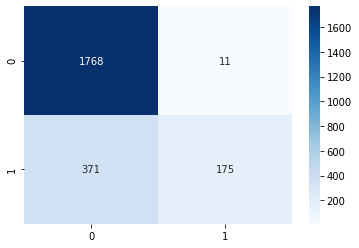

In [30]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
#plot the matrix
sns.heatmap(cf_matrix, annot=True, fmt="d",cmap='Blues');

In [31]:
#save the model as pickle
filename = "model/model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(model, file)